# Linear Regression Example one Variable

In [284]:
import numpy as np
import pandas as pd
import matplotlib as plt

data =pd.read_csv("data_linear_regression_onevarible.csv",header=None,names=["Population","Profite"])
data.describe()


,Population,Profite
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


<Axes: xlabel='Population', ylabel='Profite'>

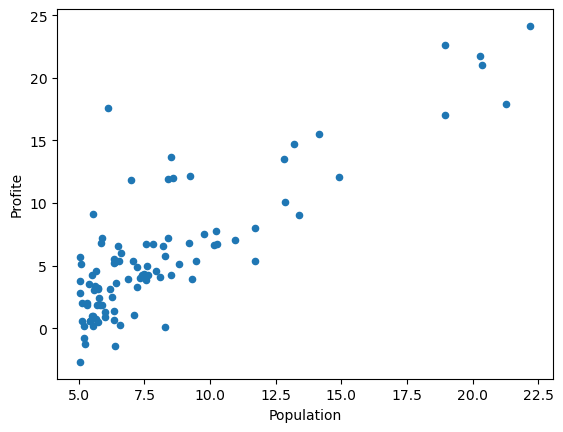

In [261]:
data.plot(kind="scatter",x="Population",y="Profite")

In [262]:
data.insert(0,'one',1) # insert(#col,name,val)
data

,one,Population,Profite
0,1,6.1101,17.59200
1,1,5.5277,9.13020
2,1,8.5186,13.66200
3,1,7.0032,11.85400
4,1,5.8598,6.82330
...,...,...,...
92,1,5.8707,7.20290
93,1,5.3054,1.98690
94,1,8.2934,0.14454
95,1,13.3940,9.05510


In [263]:

# data spliting only if the target is the last column in data

col = data.shape[1] # 97x3   col=3
#  1

X=data.iloc[:,:col-1]
Y=data.iloc[:,:-1]

#  2

X=data.iloc[:,:-1]
Y=data.iloc[:,-1]


print(X)
print(Y)


    one  Population
0     1      6.1101
1     1      5.5277
2     1      8.5186
3     1      7.0032
4     1      5.8598
..  ...         ...
92    1      5.8707
93    1      5.3054
94    1      8.2934
95    1     13.3940
96    1      5.4369

[97 rows x 2 columns]
0     17.59200
1      9.13020
2     13.66200
3     11.85400
4      6.82330
        ...   
92     7.20290
93     1.98690
94     0.14454
95     9.05510
96     0.61705
Name: Profite, Length: 97, dtype: float64


In [277]:

# target not the last col

X=pd.DataFrame(data.drop(columns=["Profite"]))
Y=pd.DataFrame(data["Profite"])
print(X)
print(Y)


    one  Population
0     1      6.1101
1     1      5.5277
2     1      8.5186
3     1      7.0032
4     1      5.8598
..  ...         ...
92    1      5.8707
93    1      5.3054
94    1      8.2934
95    1     13.3940
96    1      5.4369

[97 rows x 2 columns]
     Profite
0   17.59200
1    9.13020
2   13.66200
3   11.85400
4    6.82330
..       ...
92   7.20290
93   1.98690
94   0.14454
95   9.05510
96   0.61705

[97 rows x 1 columns]


In [278]:
X=np.matrix(X.values)
Y=np.matrix(Y.values)
theta=np.matrix(np.array([0,0]))
print(X)
print(Y)
print(theta)

[[ 1.      6.1101]
 [ 1.      5.5277]
 [ 1.      8.5186]
 [ 1.      7.0032]
 [ 1.      5.8598]
 [ 1.      8.3829]
 [ 1.      7.4764]
 [ 1.      8.5781]
 [ 1.      6.4862]
 [ 1.      5.0546]
 [ 1.      5.7107]
 [ 1.     14.164 ]
 [ 1.      5.734 ]
 [ 1.      8.4084]
 [ 1.      5.6407]
 [ 1.      5.3794]
 [ 1.      6.3654]
 [ 1.      5.1301]
 [ 1.      6.4296]
 [ 1.      7.0708]
 [ 1.      6.1891]
 [ 1.     20.27  ]
 [ 1.      5.4901]
 [ 1.      6.3261]
 [ 1.      5.5649]
 [ 1.     18.945 ]
 [ 1.     12.828 ]
 [ 1.     10.957 ]
 [ 1.     13.176 ]
 [ 1.     22.203 ]
 [ 1.      5.2524]
 [ 1.      6.5894]
 [ 1.      9.2482]
 [ 1.      5.8918]
 [ 1.      8.2111]
 [ 1.      7.9334]
 [ 1.      8.0959]
 [ 1.      5.6063]
 [ 1.     12.836 ]
 [ 1.      6.3534]
 [ 1.      5.4069]
 [ 1.      6.8825]
 [ 1.     11.708 ]
 [ 1.      5.7737]
 [ 1.      7.8247]
 [ 1.      7.0931]
 [ 1.      5.0702]
 [ 1.      5.8014]
 [ 1.     11.7   ]
 [ 1.      5.5416]
 [ 1.      7.5402]
 [ 1.      5.3077]
 [ 1.      7

In [279]:
# from sklearn.preprocessing import StandardScaler
# X=StandardScaler().fit_transform(pd.DataFrame(X))
# Y=StandardScaler().fit_transform(pd.DataFrame(Y))
print(X.shape)
print(Y.shape)
print(theta.shape)



(97, 2)
(97, 1)
(1, 2)


In [280]:
def CostFunction(X,Y,theta):
    z=np.power(X*theta.T-Y,2)
    return np.sum(z)/(2*len(X))

print(CostFunction(X,Y,theta))

32.072733877455676


In [281]:
def gradientDescent(X,Y,theta,alpha ,iter):
    temp=np.matrix(np.zeros(theta.shape))
    parm=theta.ravel().shape[1]

    cost=np.zeros(iter)
    for i in range(iter):
        error =(X*theta.T)-Y
        for j in range(parm):
            term=np.multiply(error,X[:,j])
            temp[0,j]=theta[0,j]-((alpha/len(X))*np.sum(term))
        theta=temp
        cost[i]=CostFunction(X,Y,theta)
    return theta,cost

alpha =.001
iter=10000

theta,cost=gradientDescent(X,Y,theta,alpha ,iter)

print(theta)
g=CostFunction(X,Y,theta)

print(g)
# print(cost.shape)


[[-3.24044334  1.12719788]]
4.516069827120197


Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

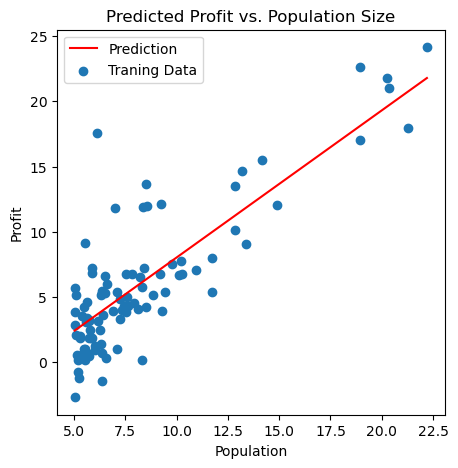

In [282]:

import matplotlib.pyplot  as plt

x = np.linspace(data.Population.min(), data.Population.max(), 100)

f=theta[0,0]+(theta[0,1]*x)

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population,  data.Profite, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')



Text(0.5, 1.0, 'Error function')

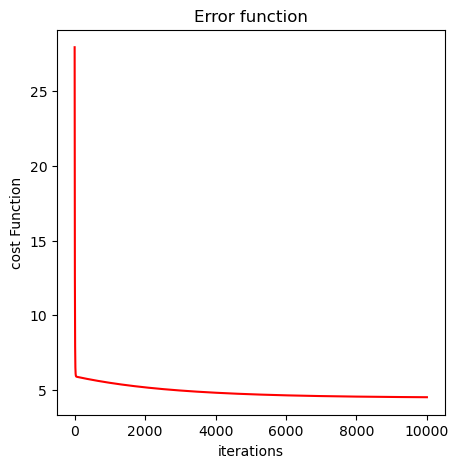

In [283]:

# draw error graph

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.array(range(iter)),cost,'r')
ax.set_xlabel('iterations')
ax.set_ylabel('cost Function')
ax.set_title('Error function')

# Linear Regression Example multivariable

In [391]:
data= pd.read_csv('data_linear_regression_multivarible.csv',names=['size','bedrooms','price'])
data

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


In [392]:
data.insert(0,'ones',1)
data

,ones,size,bedrooms,price
0,1,2104,3,399900
1,1,1600,3,329900
2,1,2400,3,369000
3,1,1416,2,232000
4,1,3000,4,539900
5,1,1985,4,299900
6,1,1534,3,314900
7,1,1427,3,198999
8,1,1380,3,212000
9,1,1494,3,242500


<Axes: xlabel='size', ylabel='price'>

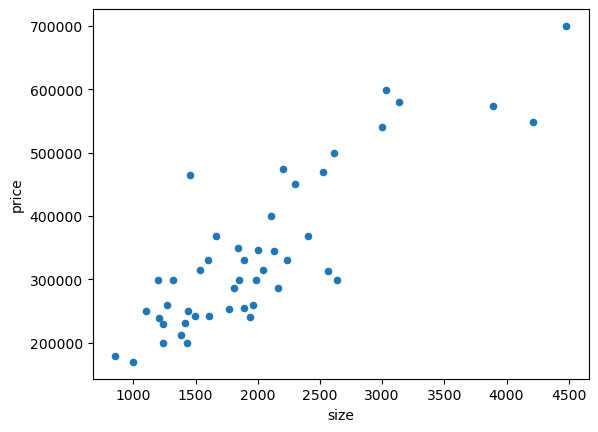

In [421]:
from sklearn.preprocessing import StandardScaler
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]
X=StandardScaler().fit_transform(pd.DataFrame(X))
Y=StandardScaler().fit_transform(pd.DataFrame(Y))
data.plot(kind='scatter',x='size',y='price')


<Axes: xlabel='bedrooms', ylabel='price'>

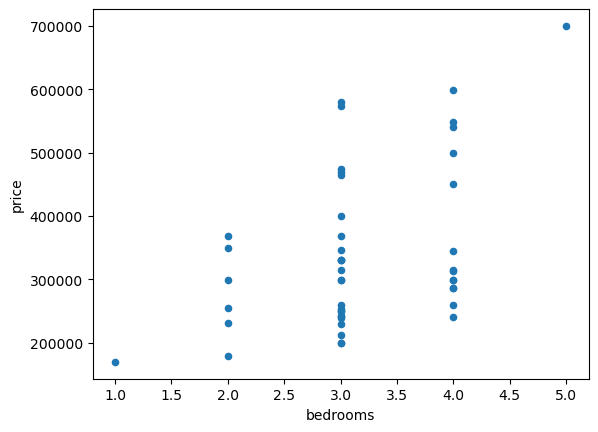

In [422]:
data.plot(kind='scatter',x='bedrooms',y='price')

In [423]:
X1=np.matrix(X)
Y1=np.matrix(Y)
theta=np.matrix(np.zeros((1,3)))

alpha=.01
iter=1000

theta,cost=gradientDescent(X1,Y1,theta=theta,alpha=alpha,iter=iter)
theta


matrix([[ 0.        ,  0.8790657 , -0.04747865]])

Text(0, 0.5, 'price')

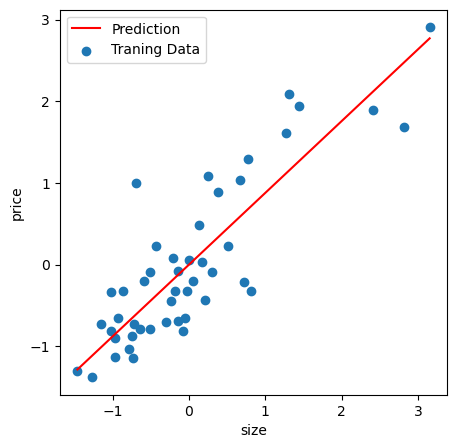

In [425]:

import matplotlib.pyplot  as plt

x1 = np.linspace(X[:,1].min(), X[:,1].max(), 1000000)
x2 = np.linspace(X[:,2].min(), X[:,2].max(), 1000000)


f= theta[0,0]+theta[0,1]*x1

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x1, f, 'r', label='Prediction')
ax.scatter(X[:,1],  Y[:,0], label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('size')
ax.set_ylabel('price')

Text(0, 0.5, 'price')

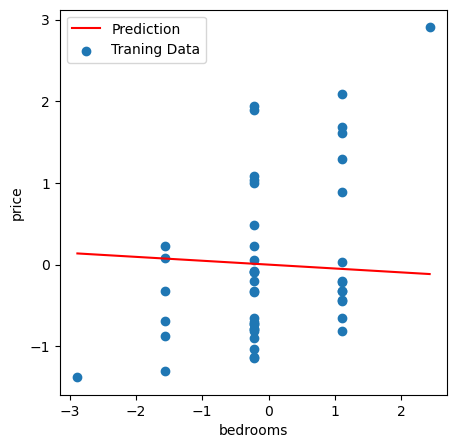

In [426]:


f= theta[0,0]+theta[0,2]*x2
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x2, f, 'r', label='Prediction')
ax.scatter(X[:,2],  Y[:,0], label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('bedrooms')
ax.set_ylabel('price')

Text(0.5, 1.0, 'Error function')

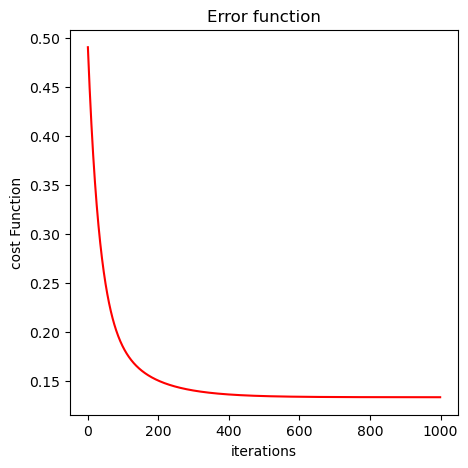

In [427]:

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.array(range(iter)),cost,'r')
ax.set_xlabel('iterations')
ax.set_ylabel('cost Function')
ax.set_title('Error function')

## Linear Regression using ready model

In [490]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

data= pd.read_csv('data_linear_regression_onevarible.csv',names=['size','price'])
data.insert(0,'ones',1)
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]



x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.3)
model =LinearRegression(fit_intercept=True)

model.fit(x_train,y_train)
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))



0.7586551377339281
0.47066290321908444


In [491]:
y_pred=model.predict(x_test)


mse=mean_squared_error(y_true=y_test,y_pred=y_pred)
mae=mean_absolute_error(y_true=y_test,y_pred=y_pred)

print(mse)
print(mae)

10.802681548710991
2.4613430386432555


Text(0, 0.5, 'price')

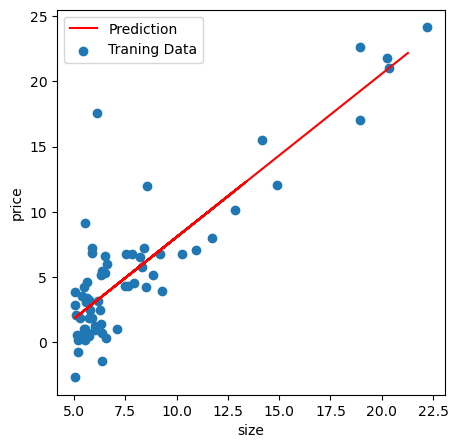

In [494]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.array(x_test)[:,1], y_pred, 'r', label='Prediction')
ax.scatter(np.array(x_train)[:,1],y_train, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('size')
ax.set_ylabel('price')

